<a href="https://colab.research.google.com/github/Eswa2020/data-prep-project/blob/master/Copy_of_Copy_of_The_next_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Variable

*   Train_df = from the train dataset
*   weather_df = from the weather dataset
*   road_segment_df = from the other dataset
*   Nairobi_df = from the nairobi geojson dataset
*   Train_df1 = Cleaned dataset from the Train_df
*   weather_df1 = waether_df that has been cleaned
*   Nairobi_df1 = the Nairobi_df dataset that has been cleaned
*   Nairobi_df2 = Dataset NAirobi_df1 that has been merged with the statistics from the train dataset
*   weather_df3 = Dataset that contains the weather merged with the number of accidents that had happened within that day that the record was made
*   Nairobi_accidents = Dataset that contains the number of accidents distributed against the wards and constituencies of Nairobi county.

##Prerequisites

#### Importing Required Libraries




In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 11 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [ ]:
import geopandas as gpd
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon

#### Loading Our Dataset

In [ ]:
#1.loeading Train.csv dataset
#
with open('/content/Train.csv', 'r') as v:
  Train_df = pd.read_csv(v)

In [ ]:
#2.loading Weather_Nairobi_Daily_GFS.csv 
#
with open('/content/Weather_Nairobi_Daily_GFS.csv', 'r') as u:
  weather_df = pd.read_csv(u)

In [ ]:
#3.loading segments_geometry.geojson
with open ('/content/segments_geometry.geojson','r') as p:
  road_segment_df = gpd.read_file(p)

In [ ]:
#4a.loading nai.geojson
#
with open('/content/nai.geojson', 'r' ) as y:
  Nairobi_df = gpd.read_file(y)


#### Data Exploration

In [ ]:
Train_df.head()

,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382


In [ ]:
Train_df.tail()

,uid,datetime,latitude,longitude
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518
6317,6318,2019-06-30 20:06:14,-1.211500,36.907635


In [ ]:
weather_df.head()

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


In [ ]:
weather_df.head()

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


In [ ]:
Nairobi_df.head(2)

,CONST_CODE,Shape_Area,OBJECTID_1,OBJECTID,CONSTITUEN,COUNTY_ASS,COUNTY_A_1,COUNTY_COD,Shape_Leng,COUNTY_NAM,Shape_Le_1,geometry
0,274,0.001689,15,26,WESTLANDS,1366,KITISURU,47,0.227746,NAIROBI,0.227746,"POLYGON ((36.75539 -1.22385, 36.75555 -1.22430..."
1,274,0.000677,27,51,WESTLANDS,1367,PARKLANDS/HIGHRIDGE,47,0.133992,NAIROBI,0.133992,"POLYGON ((36.78228 -1.24589, 36.78272 -1.24590..."


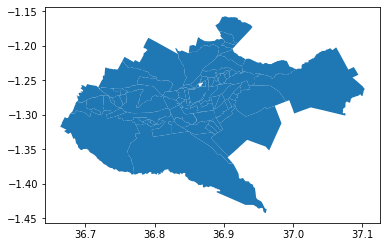

In [ ]:
Nairobi_df.plot()

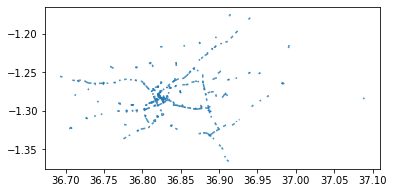

In [ ]:
road_segment_df.plot()

#DATA UNDERSTANDING

####Dataset shapes

In [ ]:
Train_df.shape

(6318, 4)

In [ ]:
weather_df.shape

(731, 7)

In [ ]:
road_segment_df.shape

(792, 3)

In [ ]:
Nairobi_df.shape

(84, 12)

####Dataset Descriptions

In [ ]:
Train_df.dtypes

uid            int64
datetime      object
latitude     float64
longitude    float64
dtype: object

In [ ]:
weather_df.dtypes

Date                                     object
precipitable_water_entire_atmosphere    float64
relative_humidity_2m_above_ground       float64
specific_humidity_2m_above_ground       float64
temperature_2m_above_ground             float64
u_component_of_wind_10m_above_ground    float64
v_component_of_wind_10m_above_ground    float64
dtype: object

In [ ]:
Nairobi_df.dtypes

CONST_CODE       int64
Shape_Area     float64
OBJECTID_1       int64
OBJECTID         int64
CONSTITUEN      object
COUNTY_ASS       int64
COUNTY_A_1      object
COUNTY_COD       int64
Shape_Leng     float64
COUNTY_NAM      object
Shape_Le_1     float64
geometry      geometry
dtype: object

In [ ]:
road_segment_df.dtypes

segment_id      object
road_name       object
geometry      geometry
dtype: object

####Checking for null values

In [ ]:
Train_df.isna().any()

uid          False
datetime     False
latitude     False
longitude    False
dtype: bool

In [ ]:
weather_df.isna().sum()

Date                                    0
precipitable_water_entire_atmosphere    3
relative_humidity_2m_above_ground       3
specific_humidity_2m_above_ground       3
temperature_2m_above_ground             3
u_component_of_wind_10m_above_ground    3
v_component_of_wind_10m_above_ground    3
dtype: int64

In [ ]:
road_segment_df.isna().any()

segment_id    False
road_name     False
geometry      False
dtype: bool

In [ ]:
Nairobi_df.isna().any()

CONST_CODE    False
Shape_Area    False
OBJECTID_1    False
OBJECTID      False
CONSTITUEN    False
COUNTY_ASS    False
COUNTY_A_1    False
COUNTY_COD    False
Shape_Leng    False
COUNTY_NAM    False
Shape_Le_1    False
geometry      False
dtype: bool

####Checking for duplicates

In [ ]:
Train_df.drop_duplicates().any()

uid          True
datetime     True
latitude     True
longitude    True
dtype: bool

In [ ]:
weather_df.duplicated().any()

False

In [ ]:
road_segment_df.duplicated().any()

False

In [ ]:
Nairobi_df.duplicated().any()

False

####Summary of the dataset

In [ ]:
Train_df12 = Train_df.copy()

In [ ]:
Train_df12['max'] = ''
Train_df12['min'] = ''

In [ ]:
q = Train_df12.index
for a in q:
  Train_df12.loc[a , 'max'] = Train_df['uid'].max()
  Train_df12.loc[a , 'min'] = Train_df['uid'].min()
  Train_df12.loc[a , 'max'] = Train_df['latitude'].max()
  Train_df12.loc[a , 'min'] = Train_df['latitude'].min()
  Train_df12.loc[a , 'max'] = Train_df['longitude'].max()
  Train_df12.loc[a , 'min'] = Train_df['longitude'].min()

In [ ]:
Train_df12

,uid,datetime,latitude,longitude,max,min
0,1,2018-01-01 00:25:46,-1.188850,36.931382,37.8795,36.3322
1,2,2018-01-01 02:02:39,-0.662939,37.208730,37.8795,36.3322
2,3,2018-01-01 02:31:49,-0.662939,37.208730,37.8795,36.3322
3,4,2018-01-01 03:04:01,-1.288087,36.826583,37.8795,36.3322
4,5,2018-01-01 03:58:49,-1.188850,36.931382,37.8795,36.3322
...,...,...,...,...,...,...
6313,6314,2019-06-29 18:52:44,-1.262271,36.726540,37.8795,36.3322
6314,6315,2019-06-30 09:57:44,-1.279468,36.790449,37.8795,36.3322
6315,6316,2019-06-30 12:02:14,-1.322109,36.825248,37.8795,36.3322
6316,6317,2019-06-30 16:59:14,-1.278589,36.816518,37.8795,36.3322


#DATA PREPARATION

##Data *cleaning*

#####Train dataset

In [ ]:
Train_df1 = Train_df.copy()

In [ ]:
# generating a statistical summary of numerical variables
Train_df1.describe()

,uid,latitude,longitude
count,6318.000000,6318.000000,6318.000000
mean,3159.500000,-1.270338,36.855459
std,1823.993832,0.125157,0.112866
min,1.000000,-3.050000,36.332202
25%,1580.250000,-1.316585,36.802048
50%,3159.500000,-1.271709,36.844591
75%,4738.750000,-1.233746,36.895642
max,6318.000000,-0.565402,37.879490


In [ ]:
#checking for duplicates
#
Train_df1.duplicated(). any()

False

In [ ]:
# check for missing values
Train_df1.isna().sum()

uid          0
datetime     0
latitude     0
longitude    0
dtype: int64

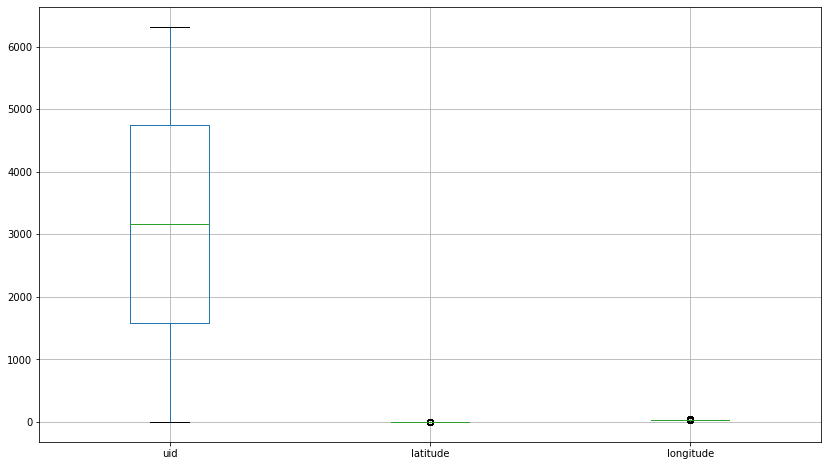

In [ ]:
# checking for outliers
plt.figure(figsize = (14, 8))
Train_df1.boxplot()
plt.show()


**Observation**: We see that the uid variable has outliers. However, we will not remove these outliers as this categorical variable.

In [ ]:
# standardizing variable names for readability
#
Train_df1.columns = Train_df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Train_df1.columns
#
#clean dataset=Train_df1

Index(['uid', 'datetime', 'latitude', 'longitude'], dtype='object')

In [ ]:
Train_df.dtypes

uid            int64
datetime      object
latitude     float64
longitude    float64
dtype: object

In [ ]:
Train_df1['Date'] = pd.to_datetime(Train_df1['datetime']).dt.date
Train_df1['Time'] = pd.to_datetime(Train_df1['datetime']).dt.time
Train_df1.head()

,uid,datetime,latitude,longitude,Date,Time
0,1,2018-01-01 00:25:46,-1.188850,36.931382,2018-01-01,00:25:46
1,2,2018-01-01 02:02:39,-0.662939,37.208730,2018-01-01,02:02:39
2,3,2018-01-01 02:31:49,-0.662939,37.208730,2018-01-01,02:31:49
3,4,2018-01-01 03:04:01,-1.288087,36.826583,2018-01-01,03:04:01
4,5,2018-01-01 03:58:49,-1.188850,36.931382,2018-01-01,03:58:49


In [ ]:
Train_df1.drop("datetime", axis=1, inplace=True)


In [ ]:
#final clean dataset
Train_df1.head()

,uid,latitude,longitude,Date,Time
0,1,-1.188850,36.931382,2018-01-01,00:25:46
1,2,-0.662939,37.208730,2018-01-01,02:02:39
2,3,-0.662939,37.208730,2018-01-01,02:31:49
3,4,-1.288087,36.826583,2018-01-01,03:04:01
4,5,-1.188850,36.931382,2018-01-01,03:58:49


#####Weather dataset

In [ ]:
weather_df1 = weather_df.copy()

In [ ]:
weather_df1.head()

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742


In [ ]:
# determining the shape of the dataset / by shape we mean size
#
weather_df1.shape

(731, 7)

In [ ]:
# generating a statistical summary of numerical variables
weather_df1.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,23.977231,83.160478,0.010955,15.175692,-1.907236,-1.128133
std,4.693146,9.084966,0.001326,1.127291,1.250924,1.118509
min,10.800000,42.200001,0.006380,11.749994,-5.880168,-3.796548
25%,20.700001,79.887714,0.010057,14.430894,-2.736363,-1.978961
50%,24.024831,85.626667,0.011251,15.231058,-1.953043,-1.084154
75%,27.500000,89.599998,0.011940,15.916383,-1.167893,-0.274010
max,34.000000,95.769302,0.013284,19.928125,3.478000,1.973149


In [ ]:
#checking for duplicates
#
weather_df1.duplicated().sum()

0

In [ ]:
#confriming no duplicates
weather_df1.duplicated().any()

False

In [ ]:
# check for missing values
weather_df1.isna().sum()


Date                                    0
precipitable_water_entire_atmosphere    3
relative_humidity_2m_above_ground       3
specific_humidity_2m_above_ground       3
temperature_2m_above_ground             3
u_component_of_wind_10m_above_ground    3
v_component_of_wind_10m_above_ground    3
dtype: int64

In [ ]:
#dropping the missing variables
weather_df1.dropna(inplace=True)

In [ ]:
#confriming no missing varables
#
weather_df1.isna().any()

Date                                    False
precipitable_water_entire_atmosphere    False
relative_humidity_2m_above_ground       False
specific_humidity_2m_above_ground       False
temperature_2m_above_ground             False
u_component_of_wind_10m_above_ground    False
v_component_of_wind_10m_above_ground    False
dtype: bool

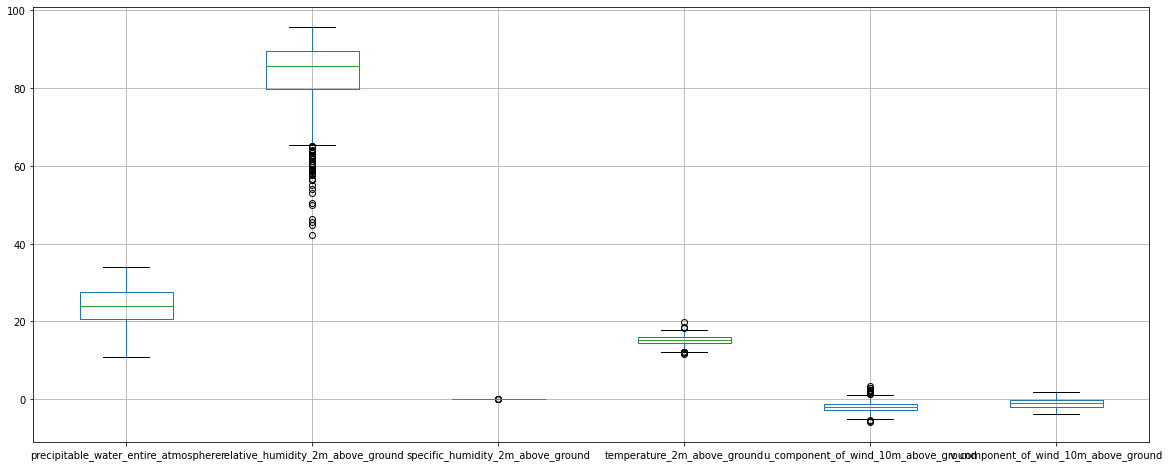

In [ ]:
# checking for outliers
plt.figure(figsize = (20, 8))
weather_df1.boxplot()
plt.show()


In [ ]:
# standardizing variable names for readability
#
weather_df1.columns = weather_df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
weather_df1.columns
#
#clean dataset= weather_df1

Index(['date', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground'],
      dtype='object')

#####Segments_geometry

In [ ]:
Road_segment_df1 = road_segment_df.copy()
#
# determining the shape of the dataset / by shape we mean size
Road_segment_df1.shape

(792, 3)

In [ ]:
#checking for duplicates
#
Road_segment_df1.duplicated(). any()

False

In [ ]:
# check for missing values
Road_segment_df1.isna().sum()

segment_id    0
road_name     0
geometry      0
dtype: int64

In [ ]:
# standardizing variable names for readability
#
Road_segment_df1.columns = Road_segment_df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Road_segment_df1.columns
# clean dataset= Road_segment_df1

Index(['segment_id', 'road_name', 'geometry'], dtype='object')

#####Nairobi.geojson

The data was found from this link:[link](https://github.com/mikelmaron/kenya-election-data/blob/master/data/wards.geojson) and the code used to narrow the data is cell bellow.




In [ ]:

#Code used for the cleaning of the geojson dataset
#
#import json
#with open('wards.geojson', 'r') as r:
#	wad = json.load(r)
#new = {}
#new['features'] = []
#for a in range (0, len (wad['features'])):
#	if wad['features'][a]['properties']['COUNTY_NAM'] == 'NAIROBI':
#		new['features'].append(wad['features'][a])
#		b += 1
#new ['type'] = wad['type']
#with open('nai.geojson' , 'w') as f:

#json.dump(new , f)

This resulted in the elimination of all the othe wards in the dataset but the ones in the Nairobi county. Due to the size of the linked dataset this had to be done on a local computer hence the inactive nature of the block of code.

In [ ]:
#previwing the dataset
#
Nairobi_df1= Nairobi_df.copy()
#
Nairobi_df1.head()

,CONST_CODE,Shape_Area,OBJECTID_1,OBJECTID,CONSTITUEN,COUNTY_ASS,COUNTY_A_1,COUNTY_COD,Shape_Leng,COUNTY_NAM,Shape_Le_1,geometry
0,274,0.001689,15,26,WESTLANDS,1366,KITISURU,47,0.227746,NAIROBI,0.227746,"POLYGON ((36.75539 -1.22385, 36.75555 -1.22430..."
1,274,0.000677,27,51,WESTLANDS,1367,PARKLANDS/HIGHRIDGE,47,0.133992,NAIROBI,0.133992,"POLYGON ((36.78228 -1.24589, 36.78272 -1.24590..."
2,274,0.003176,1,2,WESTLANDS,1368,KARURA,47,0.309800,NAIROBI,0.309800,"POLYGON ((36.81628 -1.20259, 36.81897 -1.20408..."
3,274,0.000111,42,72,WESTLANDS,1369,KANGEMI,47,0.062512,NAIROBI,0.062512,"POLYGON ((36.75282 -1.26165, 36.75336 -1.26240..."
4,274,0.000256,5,8,WESTLANDS,1370,MOUNTAIN VIEW,47,0.076896,NAIROBI,0.076896,"POLYGON ((36.74116 -1.26564, 36.74390 -1.26617..."


In [ ]:
#dropping unnessery variable
#
Nairobi_df2=Nairobi_df1 .drop (columns = ['CONST_CODE' ,	'Shape_Area' , 'OBJECTID_1' ,	'OBJECTID','COUNTY_ASS', 'COUNTY_COD', 'Shape_Leng','Shape_Le_1'])

In [ ]:
#confirmimg colunms drop
Nairobi_df2.columns

Index(['CONSTITUEN', 'COUNTY_A_1', 'COUNTY_NAM', 'geometry'], dtype='object')

In [ ]:
# standardizing variable names for readability
#
Nairobi_df2.columns = Nairobi_df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Nairobi_df2.columns

Index(['constituen', 'county_a_1', 'county_nam', 'geometry'], dtype='object')

In [ ]:
Nairobi_df2.columns = ['Constituency', 'Ward', 'County Name', 'geometry']

##Data Merging

###Geodata and accident data

In [ ]:
#creating more variable
#
Nairobi_df2['accidents_count'] = ''

In [ ]:
for n , row in Nairobi_df2.iterrows():
  if (n == 39):
    continue
  po = Polygon(Nairobi_df2.iloc[n, 3])
  acounts = 0
  for h , row in Train_df1.iterrows():
   pos = Point(row['longitude'], row ['latitude'])
   if pos.within(po) == True:
      acounts +=1
  Nairobi_df2.loc[n , 'accidents_count'] = acounts

In [ ]:
Nairobi_df2.iloc[39]

Constituency                                                 RUARAKA
Ward                                                       KOROGOCHO
County Name                                                  NAIROBI
geometry           (POLYGON ((36.88901641400003 -1.24371908099993...
accidents_count                                                     
Name: 39, dtype: object

In [ ]:
Nairobi_df2

,Constituency,Ward,County Name,geometry,accidents_count
0,WESTLANDS,KITISURU,NAIROBI,"POLYGON ((36.75539 -1.22385, 36.75555 -1.22430...",50
1,WESTLANDS,PARKLANDS/HIGHRIDGE,NAIROBI,"POLYGON ((36.78228 -1.24589, 36.78272 -1.24590...",43
2,WESTLANDS,KARURA,NAIROBI,"POLYGON ((36.81628 -1.20259, 36.81897 -1.20408...",105
3,WESTLANDS,KANGEMI,NAIROBI,"POLYGON ((36.75282 -1.26165, 36.75336 -1.26240...",128
4,WESTLANDS,MOUNTAIN VIEW,NAIROBI,"POLYGON ((36.74116 -1.26564, 36.74390 -1.26617...",66
...,...,...,...,...,...
79,MATHARE,HOSPITAL,NAIROBI,"POLYGON ((36.85506 -1.26007, 36.85554 -1.26055...",155
80,MATHARE,MABATINI,NAIROBI,"POLYGON ((36.85922 -1.26214, 36.85902 -1.26227...",1
81,MATHARE,HURUMA,NAIROBI,"POLYGON ((36.87303 -1.25046, 36.87480 -1.25445...",2
82,MATHARE,MLANGO KUBWA,NAIROBI,"POLYGON ((36.84620 -1.26098, 36.84628 -1.26107...",2


###Accident data and the weather data

In [ ]:
Train_df1.columns

Index(['uid', 'latitude', 'longitude', 'Date', 'Time'], dtype='object')

In [ ]:
weather_df1.columns

Index(['date', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground'],
      dtype='object')

In [ ]:
weather_df1.head(3)

,date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965


In [ ]:
#dropping unnessary colunms on Train_df1 dataset
Train_df3 = Train_df1.copy()
Train_df3['Count'] = 1
Train_df3 = Train_df3.groupby(['Date']).sum()
Train_df3.drop(columns = ['uid' , 'latitude' , 'longitude' ], inplace = True)
Train_df3['d'] = ''
for e , row in Train_df3.iterrows():
  Train_df3.loc[e , 'd'] = e.strftime('%Y-%m-%d')

Train_df3.head(3)

,Count,d
Date,,
2018-01-01,13,2018-01-01
2018-01-02,27,2018-01-02
2018-01-03,43,2018-01-03


In [ ]:
weather_df3 = pd.merge(weather_df1 , Train_df3, left_on='date', right_on = 'd')
weather_df3.drop(columns= ['d'], inplace= True)
weather_df3

,date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,Count
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914,13
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459,27
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965,43
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123,13
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742,13
...,...,...,...,...,...,...,...,...
530,2019-06-26,28.200001,92.099998,0.011970,15.086481,-1.306418,-0.331704,9
531,2019-06-27,24.800001,84.599998,0.010920,14.989557,-0.342876,0.512307,13
532,2019-06-28,24.500000,90.400002,0.010780,13.693811,-0.041965,0.187388,9
533,2019-06-29,23.600000,87.400002,0.010870,14.340265,-0.090295,-0.085813,12


In [ ]:
weather_df3.shape

(535, 8)

#DATA ANALYSIS

#Hypothesis testing

* weather affects occurence of accidents
* Equal distribution of accidents per county

In [ ]:
Train_df1.head(3)

,uid,latitude,longitude,Date,Time
0,1,-1.188850,36.931382,2018-01-01,00:25:46
1,2,-0.662939,37.208730,2018-01-01,02:02:39
2,3,-0.662939,37.208730,2018-01-01,02:31:49


In [ ]:
Train_df1.loc [2, 'Time']

datetime.time(2, 31, 49)

##Datasets for use in data analysis

In [ ]:
weather_accidents = weather_df3.copy()
Nairobi_accidents = Nairobi_df2.drop(columns= ['geometry'])

In [ ]:
weather_accidents.columns

Index(['date', 'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground', 'Count'],
      dtype='object')

In [ ]:
Nairobi_accidents.columns

Index(['Constituency', 'Ward', 'County Name', 'accidents_count'], dtype='object')

### Univeriate Analysis

In [ ]:
Nairobi_accidents['accidents_count']

0      50
1      43
2     105
3     128
4      66
     ... 
79    155
80      1
81      2
82      2
83      0
Name: accidents_count, Length: 84, dtype: object

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.

#####1.Train dataset

In [ ]:
# previewing dataset
#
Train_df1.head(3)

,uid,latitude,longitude,Date,Time
0,1,-1.188850,36.931382,2018-01-01,00:25:46
1,2,-0.662939,37.208730,2018-01-01,02:02:39
2,3,-0.662939,37.208730,2018-01-01,02:31:49


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


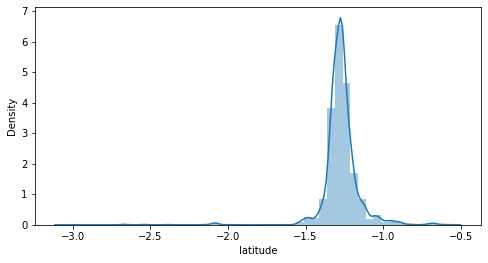

In [ ]:
# univariate analysis: 'latitude' variable
plt.figure(figsize = (8, 4))
sns.distplot(Train_df1.latitude);

Observation The latitude variable is normally distributed

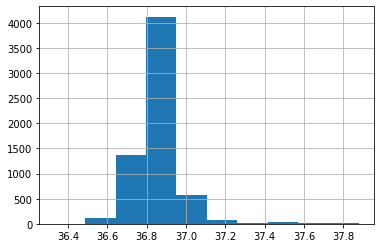

In [ ]:
##univariate analysis: histogram of the longitude variable
Train_df1.longitude.hist()
plt.show()

**Observation** The longitude variable is normally distributed

#####2.Weather dataset

In [ ]:
#data preview
#
weather_df1.v_component_of_wind_10m_above_ground. unique()

array([-9.33913529e-01, -4.85458970e-01, -6.53964818e-01,  9.08122540e-01,
       -3.77416983e-02, -1.72041011e+00, -8.13266575e-01, -1.86177242e+00,
       -6.93701148e-01, -1.48097169e+00, -7.49462903e-01, -9.00454104e-01,
       -1.77378416e+00, -1.21198487e+00, -6.33041978e-01, -1.53457034e+00,
       -7.40070760e-01, -1.85853028e+00, -1.59531486e+00, -1.35308588e+00,
       -2.11080074e+00, -2.53365707e+00, -1.79395509e+00, -2.30303717e+00,
       -2.54138422e+00, -6.28618121e-01, -2.21761703e+00, -1.82368410e+00,
       -2.24628901e+00, -2.06695795e+00, -2.33019042e+00, -2.83146977e+00,
       -1.83477044e+00, -2.06378913e+00, -2.05623293e+00, -1.98433828e+00,
       -2.46946526e+00, -1.93684804e+00, -2.32990479e+00, -1.37469482e+00,
       -2.82811999e+00, -3.01253891e+00, -3.14523673e+00, -2.00082994e+00,
       -2.03348637e+00, -1.97318602e+00, -3.20837402e+00, -3.44205308e+00,
       -2.94757557e+00, -2.71642566e+00, -1.97716796e+00, -2.29360342e+00,
       -2.03883791e+00, -

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


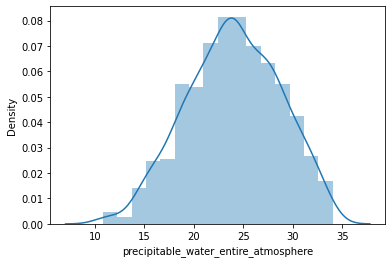

In [ ]:
# univariate analysis: precipitable_water_entire_atmosphere variable
sns.distplot(weather_df1.precipitable_water_entire_atmosphere); 

**Observation** 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


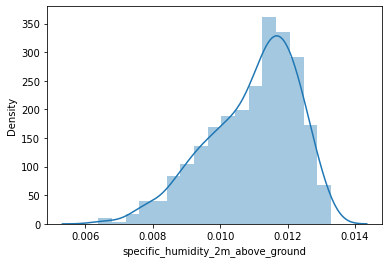

In [ ]:
# univariate analysis: specific_humidity_2m_above_ground variable
sns.distplot(weather_df1.specific_humidity_2m_above_ground);

**Observation**. 

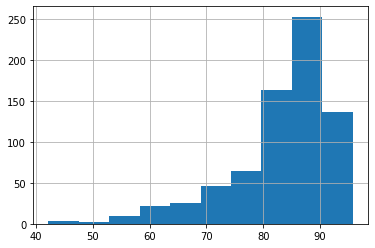

In [ ]:
#univariate analysis: relative_humidity_2m_above_ground variable
#
weather_df1.relative_humidity_2m_above_ground.hist()
plt.show()

**Observation**

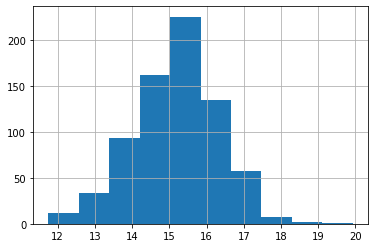

In [ ]:
weather_df1.temperature_2m_above_ground.hist()
plt.show()

**Observation**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


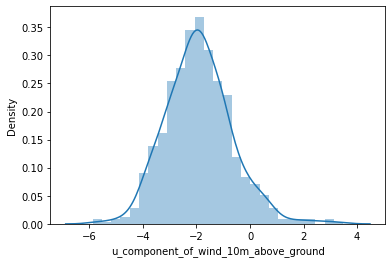

In [ ]:
# univariate analysis: u_component_of_wind_10m_above_ground
sns.distplot(weather_df1.u_component_of_wind_10m_above_ground)

**Observation**

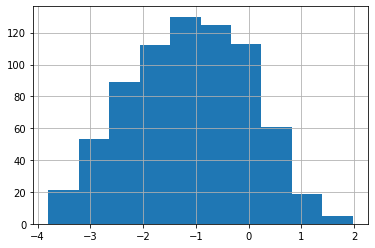

In [ ]:
#univariate analysis: v_component_of_wind_10m_above_ground variable
#
weather_df1.v_component_of_wind_10m_above_ground.hist()
plt.show()

**Observation**

In [ ]:
#summary
weather_df1.describe()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,23.977231,83.160478,0.010955,15.175692,-1.907236,-1.128133
std,4.693146,9.084966,0.001326,1.127291,1.250924,1.118509
min,10.800000,42.200001,0.006380,11.749994,-5.880168,-3.796548
25%,20.700001,79.887714,0.010057,14.430894,-2.736363,-1.978961
50%,24.024831,85.626667,0.011251,15.231058,-1.953043,-1.084154
75%,27.500000,89.599998,0.011940,15.916383,-1.167893,-0.274010
max,34.000000,95.769302,0.013284,19.928125,3.478000,1.973149


#####3.Nairobi.geojson

In [ ]:
#previeving data 
#
Nairobi_df2.head()

,Constituency,Ward,County Name,geometry,accidents_count
0,WESTLANDS,KITISURU,NAIROBI,"POLYGON ((36.75539 -1.22385, 36.75555 -1.22430...",50
1,WESTLANDS,PARKLANDS/HIGHRIDGE,NAIROBI,"POLYGON ((36.78228 -1.24589, 36.78272 -1.24590...",43
2,WESTLANDS,KARURA,NAIROBI,"POLYGON ((36.81628 -1.20259, 36.81897 -1.20408...",105
3,WESTLANDS,KANGEMI,NAIROBI,"POLYGON ((36.75282 -1.26165, 36.75336 -1.26240...",128
4,WESTLANDS,MOUNTAIN VIEW,NAIROBI,"POLYGON ((36.74116 -1.26564, 36.74390 -1.26617...",66


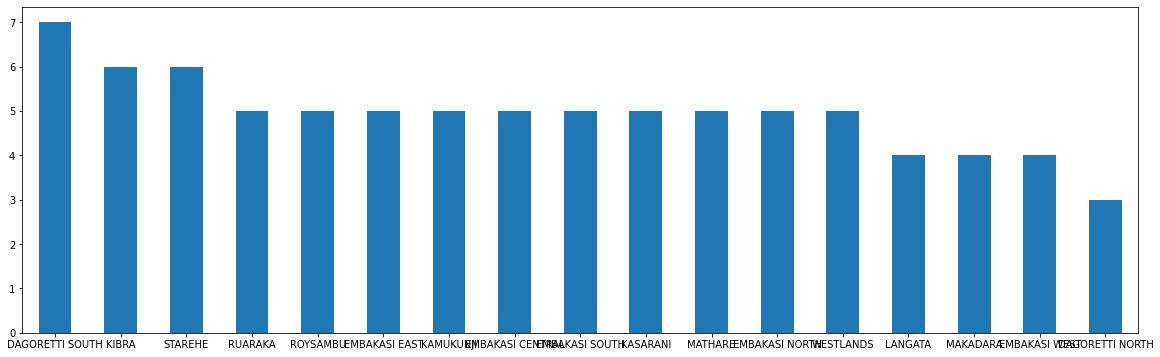

In [ ]:
# univariate analysis: constituen variable
#
plt.figure(figsize = (20, 6))
location_accidents.Constituency.value_counts().plot(kind = 'bar', rot = 0);

**Observation** Dagoreti South consituent had the highest number of accidents

## Bivariate Analysis

We will now perform bivariate analysis. This is a type of analysis done on two variable. This type of analysis will be helpful in understanding the relationship between varables.

We will investigate how the target variable relates to the other variables

In [ ]:
#previer of merged dataset
weather_df3.head()

,date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,Count
0,2018-01-01,24.100000,72.700005,0.009560,15.161493,-0.012186,-0.933914,13
1,2018-01-02,27.362288,74.900002,0.010463,16.047998,0.314543,-0.485459,27
2,2018-01-03,30.246618,86.599998,0.011930,15.838525,-0.282732,-0.653965,43
3,2018-01-04,33.010689,90.900002,0.012780,16.169244,0.211572,0.908123,13
4,2018-01-05,27.250372,82.413353,0.011392,15.923456,1.047275,-0.037742,13


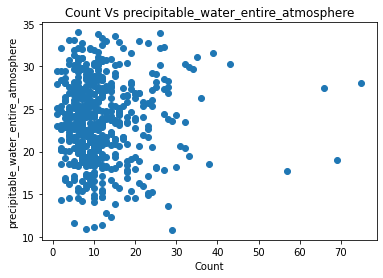

In [ ]:
# bivariate analysis: accident count by precipitate water in atmosphire
#
# Plotting our scatterplot
plt.scatter(weather_df3['Count'], weather_df3['precipitable_water_entire_atmosphere'])

# Giving our scatterplot a title
plt.title('Count Vs precipitable_water_entire_atmosphere')

# Labelling our x axis
plt.xlabel('Count')

# Labelling our y axis
plt.ylabel('precipitable_water_entire_atmosphere')

# Displaying our scatterplot
plt.show()

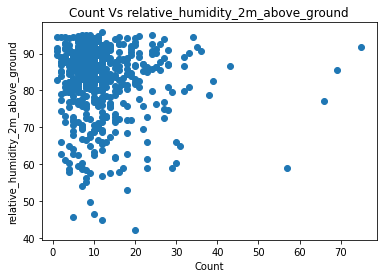

In [ ]:
# bivariate analysis: accident count by ralative humidity above ground
#
# Plotting our scatterplot
plt.scatter(weather_df3['Count'], weather_df3['relative_humidity_2m_above_ground'])

# Giving our scatterplot a title
plt.title('Count Vs relative_humidity_2m_above_ground')

# Labelling our x axis
plt.xlabel('Count')

# Labelling our y axis
plt.ylabel('relative_humidity_2m_above_ground')

# Displaying our scatterplot
plt.show()

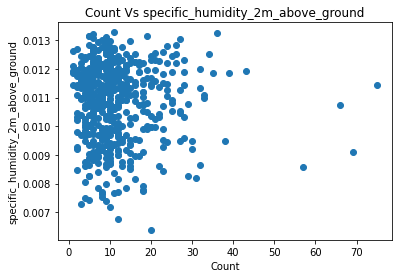

In [ ]:
# bivariate analysis: accident count by humidity above the ground
#
# Plotting our scatterplot
plt.scatter(weather_df3['Count'], weather_df3['specific_humidity_2m_above_ground'])

# Giving our scatterplot a title
plt.title('Count Vs specific_humidity_2m_above_ground')

# Labelling our x axis
plt.xlabel('Count')

# Labelling our y axis
plt.ylabel('specific_humidity_2m_above_ground')

# Displaying our scatterplot
plt.show()

**Observation** 'accident count' and 'specific_humidity_2m_above_ground have week relatioship.

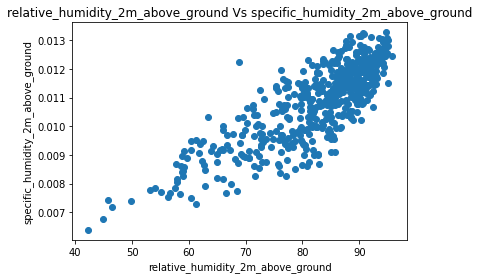

In [ ]:
# bivariate analysis: accident count by humidity above the ground
#
# Plotting our scatterplot
plt.scatter(weather_df3['relative_humidity_2m_above_ground'], weather_df3['specific_humidity_2m_above_ground'])

# Giving our scatterplot a title
plt.title('relative_humidity_2m_above_ground Vs specific_humidity_2m_above_ground')

# Labelling our x axis
plt.xlabel('relative_humidity_2m_above_ground')

# Labelling our y axis
plt.ylabel('specific_humidity_2m_above_ground')

# Displaying our scatterplot
plt.show()

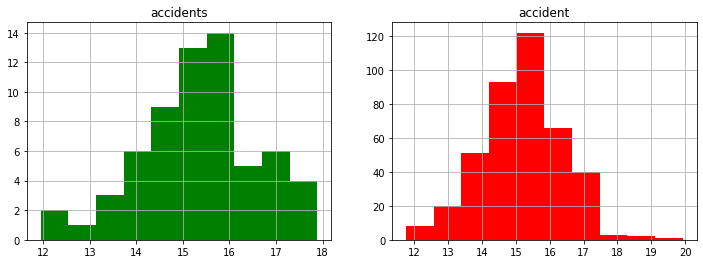

In [ ]:
# accident by temperature
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# accidents when temperature  is greater than 20 degrees celcius
plt.subplot(1, 2, 1)
weather_df3.loc[weather_df3.Count >20].temperature_2m_above_ground.hist(color = 'green')
plt.title("accidents")

# accident count when temperature is below 15 degrees celcius
plt.subplot(1, 2, 2)
weather_df3.loc[weather_df3.Count <15].temperature_2m_above_ground.hist(color = 'red')
plt.title("accident")

plt.show()

**Observation** there were more accidents when the temperature was below 15 degrees celcius.

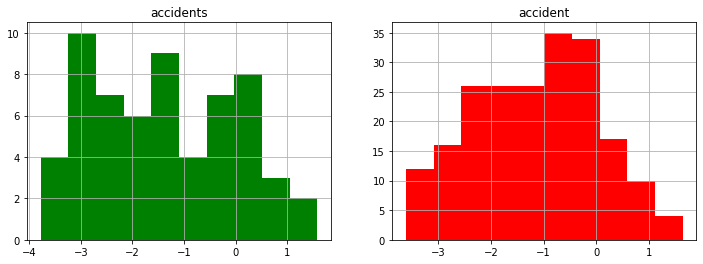

In [ ]:
# accident by wind
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# accidents when wind  is less than 5 mph
plt.subplot(1, 2, 1)
weather_df3.loc[weather_df3.Count <5].v_component_of_wind_10m_above_ground.hist(color = 'green')
plt.title("accidents")

# accident count when wind is greater than 11 mph.
plt.subplot(1, 2, 2)
weather_df3.loc[weather_df3.Count > 11].v_component_of_wind_10m_above_ground.hist(color = 'red')
plt.title("accident")

plt.show()

**observation** there is more accidents during the strong wind as depicted by the second chart.

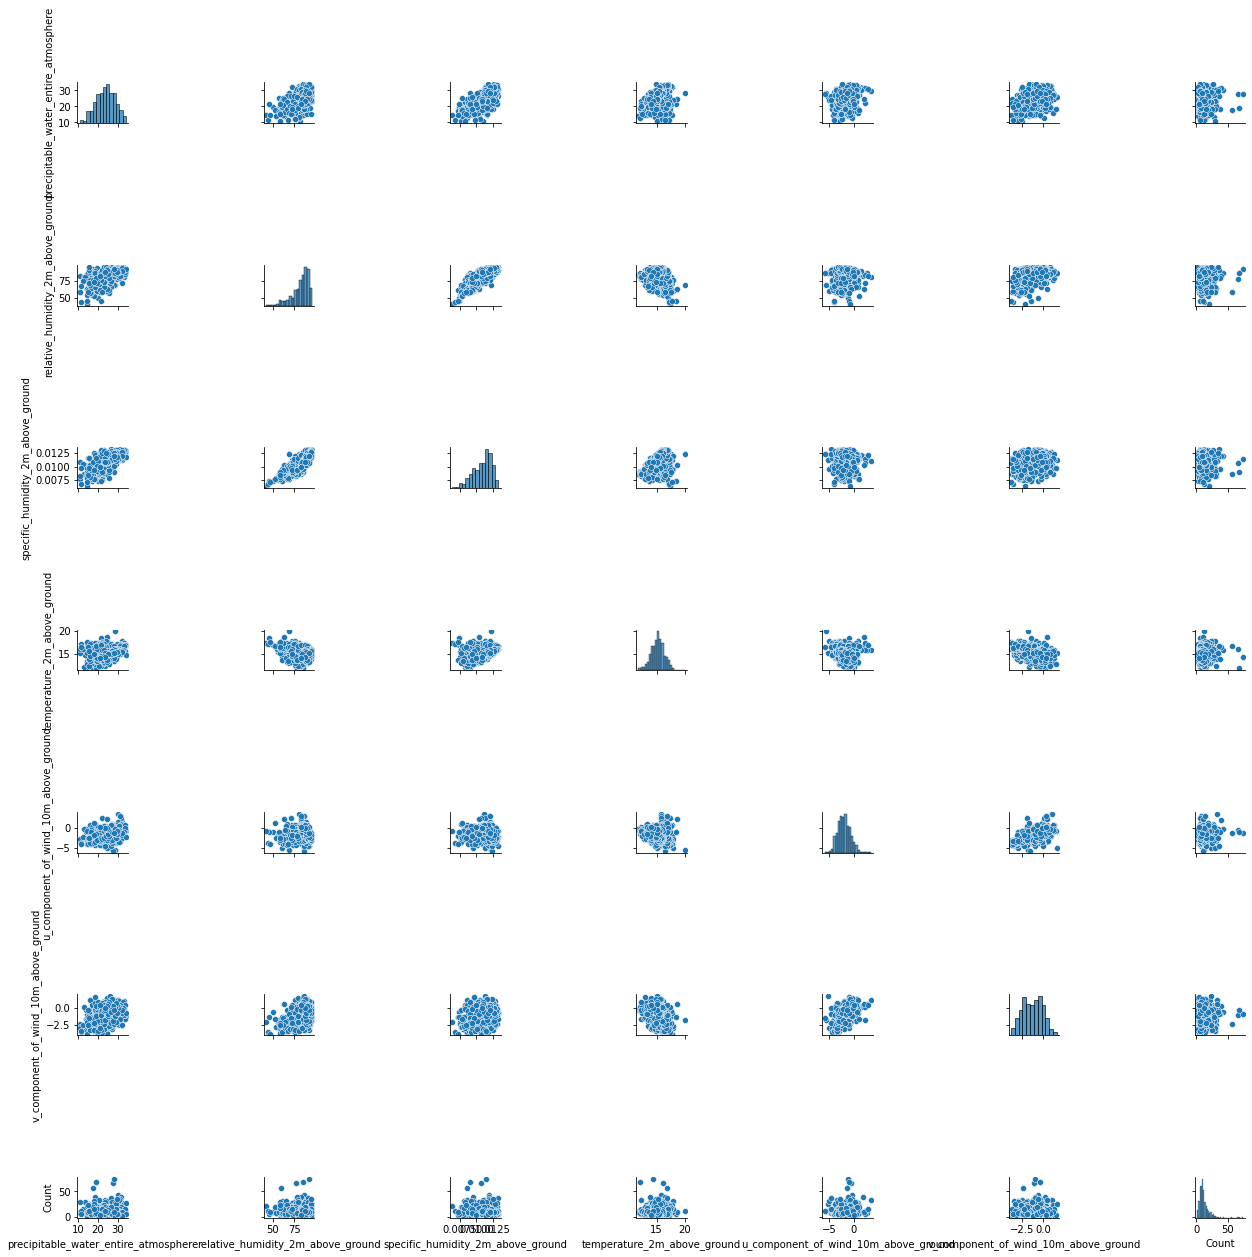

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(weather_df3)
plt.show()

**observation**looking at the above, we can confirm just a few very few dependencies

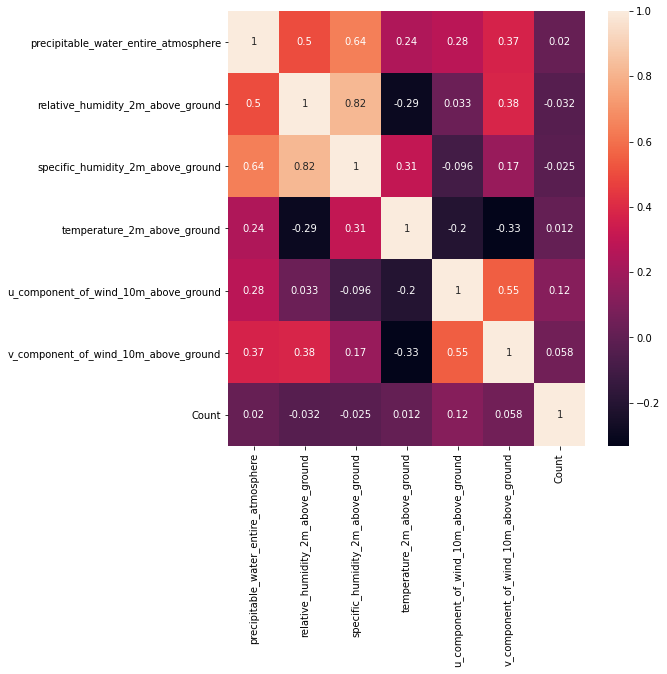

In [ ]:
# correlation of the variable in merged Dataset
#
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (8, 8))
sns.heatmap(weather_df3.corr(), annot=True, );

**Observation** the variable "relative_humidity_2m_above_ground" and "specific_humidity_2m_above_ground" have a strong positive correlation. This means that as values of one variables increase, so do the values of the other variable 

<BarContainer object of 17 artists>

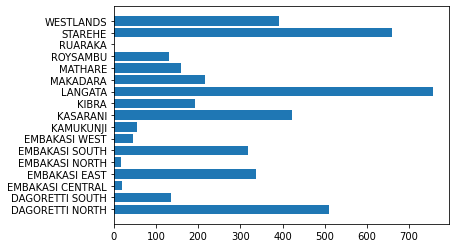

In [ ]:
#Nairobi_ward = Nairobi_df2.copy()
Nairobi_ward.drop(columns=['Ward', 'County Name'], inplace= True)
Nairobi_ward = Nairobi_ward.groupby(['Constituency']).sum()
plt.barh(Nairobi_ward.index,Nairobi_ward['accidents_count'])

**Observation** Langata registered the highest number within nairobi count during the period under observation.